In [7]:
#run this if scikit plot is not installed
!pip install scikit-plot

In [9]:
#check current directory 
import os
currentDirectory = os.getcwd()
currentDirectory

'C:\\Users\\Clement\\Desktop\\Swinburne\\Degree\\Intro to AI\\Assignment 2\\Group4.A2_S2_COS30019'

In [2]:
# Import all necessary libraries
import matplotlib
import math
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from tensorflow.keras.optimizers import Adam
import itertools
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, f1_score, roc_curve
from keras.preprocessing import image
from IPython.display import display 
from PIL import Image
from sklearn.linear_model import LinearRegression

In [11]:
#for accessing data in local
DATADIR = currentDirectory + "/covid"
CATEGORIES = ["COVID","non-COVID"]

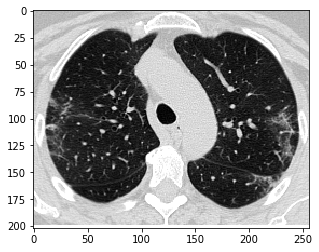

In [12]:
#Display the first image in the dataset
for category in CATEGORIES:  # do for all covid and non-covid
    path = os.path.join(DATADIR,category)  # create path to covid and non-covid
    for img in os.listdir(path):  # iterate over each image for Covid and non-Covid
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display

        break
    break #to print out just one image

In [13]:
#display out the size of image
print(img_array.shape)

(202, 256)


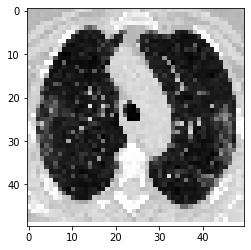

In [14]:
#display how the image will look like after resized
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [15]:
processed_data = []

def create_processed_data():
    for category in CATEGORIES:  # do for all covid and non-covid

        path = os.path.join(DATADIR,category)  # create path to covid and non-covid
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1). 0=Covid 1=non-Covid

        for img in tqdm(os.listdir(path)):  # iterate over each image for Covid and non-Covid
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                processed_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean
                pass

create_processed_data()

print(len(processed_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1229/1229 [00:03<00:00, 341.19it/s]


2481


In [18]:
#data randomised to prevent bias results by the order of the data
random.shuffle(processed_data)

In [19]:
for sample in processed_data[:10]:
    print(sample[1])

0
0
0
0
1
0
0
1
1
1


In [20]:
for features,label in processed_data:
    print(features)
    print(label)

[[205 208 206 ... 223 188  56]
 [205 212 207 ... 203 204 216]
 [207 208 209 ... 201 207 200]
 ...
 [207 203 212 ... 202 213 206]
 [204 210 201 ... 208 206 225]
 [205 209 207 ... 227 236 183]]
0
[[197 194 197 ... 196 193 219]
 [195 196 192 ... 201 196 198]
 [194 192 194 ... 195 191 196]
 ...
 [227 224 224 ... 205 197 200]
 [207 214 221 ... 187 190 224]
 [196 194 201 ... 218 219  77]]
0
[[207 207 205 ... 205 205 203]
 [209 209 207 ... 204 204 203]
 [207 207 209 ... 204 204 206]
 ...
 [208 206 207 ... 212 208 209]
 [207 206 209 ... 207 208 207]
 [205 205 210 ... 207 209 208]]
0
[[225 231 223 ... 209 221 233]
 [228 218 217 ... 211 222 232]
 [227 221 231 ... 204 221 222]
 ...
 [230 235 231 ... 236 232 232]
 [232 223 223 ... 227 222 220]
 [229 239 241 ... 237 242 238]]
0
[[228 232 233 ... 205 205  75]
 [232 233 228 ... 209 205 150]
 [232 233 230 ... 209 206 203]
 ...
 [208 206 215 ... 206 216  68]
 [203 205 203 ... 222  75  65]
 [227 205 206 ... 129  66  65]]
1
[[207 202 222 ... 205 210 202]

 [222 216 215 ... 214 189 195]]
0
[[203 197 203 ... 206 212 206]
 [204 205 218 ... 201 213 210]
 [202 203 218 ... 215 200 207]
 ...
 [212 206 205 ... 194 253 127]
 [123 227 207 ... 179 244  68]
 [ 79 176 247 ... 145  73  81]]
0
[[224 228 230 ... 234 224 224]
 [234 233 229 ... 233 233 234]
 [232 231 227 ... 233 235 233]
 ...
 [240 229 236 ... 249 254 255]
 [241 230 232 ... 254 254 255]
 [234 236 231 ... 239 246 255]]
1
[[ 68  68  68 ... 196  68  68]
 [ 68  72 216 ... 191  89  68]
 [ 69 166 193 ... 200 199  68]
 ...
 [208 216 237 ... 224 219 209]
 [183 190 200 ... 231 213 195]
 [194 203 220 ... 186 184 190]]
0
[[191 215 223 ... 195 198 197]
 [208 225 224 ... 196 196 191]
 [221 226 227 ... 197 196 195]
 ...
 [225 221 220 ... 230 250 221]
 [253 224 225 ... 255 255 226]
 [221 222 218 ... 255 255 255]]
0
[[193 196 195 ... 193 195 191]
 [195 196 197 ... 194 196 198]
 [188 193 223 ... 209 191 193]
 ...
 [216 227 222 ... 234 255 220]
 [229 255 227 ... 255 255 221]
 [221 225 220 ... 255 255 254]

 [223 224 225 ... 189 195 198]]
0
[[ 63  63  64 ...  63  64  64]
 [ 63  63  64 ...  63  63  62]
 [ 64  63  63 ...  64  65  63]
 ...
 [ 72  70 113 ... 205 238  70]
 [ 71  72  70 ... 237  88  58]
 [ 83  69  70 ...  90  78 114]]
1
[[217 188 201 ... 191 164  70]
 [188 197 189 ... 199 188 208]
 [194 192 194 ... 193 190 186]
 ...
 [206 201 208 ... 205 192 202]
 [203 194 194 ... 199 192 199]
 [199 202 206 ... 209 192 206]]
0
[[234 232 232 ... 233 233 233]
 [234 232 232 ... 233 231 233]
 [233 231 231 ... 232 221 226]
 ...
 [229 228 232 ... 226 229 228]
 [230 228 228 ... 230 231 230]
 [229 230 229 ... 231 229 228]]
0
[[205 206 209 ... 203 202 207]
 [210 204 209 ... 206 203 206]
 [204 212 202 ... 204 203 207]
 ...
 [242 220 219 ... 198 218 216]
 [217 212 231 ... 203 211 214]
 [212 195 214 ... 209 206 204]]
0
[[ 68  68  68 ...  71  69  69]
 [ 68  68  68 ...  73  68  68]
 [ 68  68  68 ...  69  68  69]
 ...
 [190 205 212 ...  99  80  73]
 [101 199 206 ...  95  71  68]
 [107  85 199 ...  70  69 118]

 [206 209 206 ... 205 205 208]]
0
[[203 203 203 ... 205 201 169]
 [203 203 204 ... 203 203 207]
 [206 203 207 ... 204 205 203]
 ...
 [251 255 254 ... 228 226 232]
 [255 255 230 ... 229 224 210]
 [249 218 225 ... 209 206 206]]
1
[[ 65  66  65 ...  66  63  64]
 [ 67  67  66 ...  65  63  63]
 [ 65  67 200 ...  69  64  64]
 ...
 [102 253 204 ...  99  65  68]
 [ 72 243 108 ...  70  71  69]
 [ 72  67  76 ...  72  71  71]]
0
[[206 204 208 ... 213 206 204]
 [206 207 218 ... 213 209 206]
 [204 209 225 ... 206 204 206]
 ...
 [205 212 231 ... 252 242 242]
 [203 203 204 ... 254 255 252]
 [208 205 206 ... 255 252 203]]
1
[[ 65  61  61 ...  63  61  64]
 [ 66  65  65 ...  66  68  67]
 [ 65  65  66 ...  69  69  65]
 ...
 [253 255 255 ... 254 255 255]
 [255 255 255 ... 255 255 255]
 [255 254 255 ... 254 255 255]]
0
[[226 215 223 ... 216 191 190]
 [235 226 222 ... 220 228 205]
 [229 233 225 ... 222 219 218]
 ...
 [223 234 225 ... 224 249 225]
 [209 214 230 ... 254 229 220]
 [255 248 245 ... 222 212 255]

 [ 74 216 206 ...  66  67  66]]
1
[[ 67  65  93 ...  70  66  65]
 [ 68  76 204 ...  69  68  67]
 [ 63 212 204 ...  67  65  67]
 ...
 [207 217 230 ... 207 209 215]
 [205 205 208 ... 204 226 158]
 [208 208 208 ... 234 117 197]]
0
[[208 199 204 ... 205  81  67]
 [207 205 226 ... 210 217  83]
 [209 216 233 ... 207 209 219]
 ...
 [222 229 228 ... 208 207 222]
 [226 221 223 ... 215 233 196]
 [221 229 217 ... 237 103 223]]
1
[[ 64  71  58 ... 212 232 150]
 [ 63  62 198 ... 207 207 227]
 [ 66 206 211 ... 206 203 211]
 ...
 [231 230 230 ... 234 234 213]
 [211 229 231 ... 213 210 211]
 [203 205 227 ... 210 209 210]]
0
[[202 202 206 ... 202 198 207]
 [207 204 204 ... 192 198 197]
 [205 198 206 ... 223 208 211]
 ...
 [245 234 234 ... 231 214 211]
 [210 220 236 ... 218 219 206]
 [210 209 205 ... 206 213 206]]
1
[[ 64  64  65 ...  66  62  64]
 [ 63  65  66 ...  65  65  66]
 [ 63  65  66 ...  65  66  66]
 ...
 [ 70  67 252 ...  62  76  73]
 [198  75  66 ...  71  72  72]
 [ 74  66 231 ...  72  72  70]

 [ 73  73  73 ... 129 132 123]]
1
[[ 71 219 209 ...  77  70  68]
 [239 204 210 ... 114  86  65]
 [200 207 205 ... 206  60  92]
 ...
 [254 214 224 ... 229 221 232]
 [229 253 232 ... 226 231 232]
 [224 231 254 ... 237 229 229]]
0
[[207 214 214 ... 206 206 204]
 [204 219 211 ... 203 206 205]
 [208 219 208 ... 204 207 205]
 ...
 [236 239 244 ... 231 234 234]
 [238 243 241 ... 228 234 224]
 [237 232 240 ... 234 225 206]]
1
[[234 237 230 ... 230 236 236]
 [237 233 224 ... 239 235 231]
 [230 229 223 ... 232 231 231]
 ...
 [203 210 206 ... 212 205 213]
 [204 215 212 ... 203 202 203]
 [227 214 204 ... 195 200 202]]
0
[[232 229 231 ... 219 221 220]
 [228 233 230 ... 229 234 231]
 [230 233 232 ... 228 230 231]
 ...
 [254 255 255 ... 229 232 230]
 [240 249 255 ... 246 254 255]
 [230 239 252 ... 255 255 255]]
0
[[ 66  64  65 ...  63  67  65]
 [ 63  63  65 ...  64  68  65]
 [ 66  67  65 ...  61  67  67]
 ...
 [211 229 230 ... 228 250 118]
 [196 182 235 ... 240 158 179]
 [ 73 133 161 ... 132 153 240]

 [213 214 222 ... 226  72  75]]
1
[[ 70  69  68 ...  63  62  63]
 [ 70  68  68 ...  66  64  63]
 [ 68  68  69 ...  66  65  64]
 ...
 [201 203 202 ... 212 113 177]
 [227 207 203 ... 143 186  79]
 [160 202 219 ... 110  81  72]]
1
[[ 57  57  62 ... 200 176  48]
 [ 57  54 200 ... 198 204  87]
 [ 56 119 202 ... 199 198 217]
 ...
 [209 205 213 ... 203 201 196]
 [212 205 204 ... 208 202 222]
 [192 232 216 ... 210 226 213]]
0
[[ 70  69  66 ...  67  65  64]
 [ 68  67  66 ...  66  74  67]
 [ 67  68 170 ...  66  66  73]
 ...
 [207 209 210 ... 203 204 213]
 [212 205 207 ... 204 228 158]
 [159 227 212 ... 220 161 143]]
1
[[206 211 205 ... 208 202 203]
 [213 211 209 ... 213 209 202]
 [205 205 208 ... 207 203 205]
 ...
 [198 202 211 ... 206 205 202]
 [200 205 208 ... 210 207 207]
 [230 209 211 ... 196 195 202]]
1
[[ 65  66  69 ... 208 210  80]
 [ 63  65 191 ... 202 209 178]
 [ 67 183 201 ... 203 211 206]
 ...
 [243 229 237 ... 227 227 216]
 [254 231 225 ... 228 218 210]
 [229 254 234 ... 218 214 212]

 [206 205 205 ... 203 216 127]]
0
[[214 225 233 ... 229 223 232]
 [226 228 234 ... 228 234 233]
 [236 234 233 ... 227 237 231]
 ...
 [239 234 216 ... 253 254 253]
 [238 229 222 ... 235 241 254]
 [240 233 232 ... 211 223 230]]
0
[[ 64 216 206 ...  67  73  62]
 [216 207 208 ...  73  66  68]
 [206 207 206 ... 208  68  75]
 ...
 [206 208 211 ... 206 209 205]
 [220 206 210 ... 207 203 220]
 [194 225 206 ... 207 230 205]]
0
[[ 68  68  70 ...  68  68  68]
 [ 68  68  69 ...  68  68  68]
 [ 68  69 202 ...  79  69  68]
 ...
 [194 193 198 ... 203 202 203]
 [201 200 204 ... 213 205 205]
 [200 204 203 ... 201 225 179]]
0
[[ 68  68  68 ...  68  68  68]
 [ 68  68  69 ...  68  68  68]
 [ 68  68  68 ...  68  68  68]
 ...
 [187 217 222 ... 205 193 221]
 [191 194 198 ... 203 224  79]
 [224 202 200 ... 229  97  81]]
0
[[ 64  64  64 ...  64  63  64]
 [ 63  64  63 ...  62  63  64]
 [ 63  64  63 ...  62  63  64]
 ...
 [140 150 113 ...  68  69  71]
 [ 79  62 102 ...  70  69  70]
 [ 71  74  73 ...  68  70  68]

 [ 68  69  94 ... 232  64  73]]
1
[[207 207 206 ... 202 204 205]
 [207 207 210 ... 205 204 204]
 [207 210 209 ... 205 203 207]
 ...
 [232 228 219 ... 254 255 240]
 [231 228 233 ... 255 233 250]
 [226 226 229 ... 254 253 250]]
1
[[188 198 190 ... 206 203 197]
 [197 199 192 ... 196 205 203]
 [200 192 191 ... 182 189 195]
 ...
 [225 219 223 ... 193 181 206]
 [206 207 204 ... 206 194 205]
 [198 206 199 ... 229  63  52]]
0
[[ 72  68  71 ...  68  68  69]
 [ 80  69  74 ...  68  68  69]
 [ 69  68  68 ...  82  68  68]
 ...
 [198 198 200 ... 147  68  69]
 [192 201 208 ...  70  68  69]
 [127 214 186 ...  70  68  79]]
0
[[191 191 197 ... 197 188 193]
 [192 197 183 ... 189 196 193]
 [186 192 196 ... 198 192 197]
 ...
 [193 196 202 ... 200 192 189]
 [201 193 206 ... 194 192 199]
 [226 193 197 ... 198 197 207]]
0
[[214 203 207 ... 209 205 222]
 [203 207 208 ... 207 206 214]
 [204 204 205 ... 209 210 218]
 ...
 [210 222 219 ... 235 235 233]
 [210 215 230 ... 228 229 231]
 [209 208 217 ... 214 212 210]

 [203 203 201 ... 202 213 207]]
0
[[195 190 196 ... 194 198 192]
 [196 192 192 ... 198 190 196]
 [194 192 194 ... 197 193 197]
 ...
 [221 218 222 ... 196 195 194]
 [217 220 232 ... 222 221 225]
 [218 223 255 ... 255 255 255]]
0
[[ 69  64  66 ...  70  64  64]
 [ 66  66  70 ...  81  64  64]
 [ 68  67  65 ...  62  73  67]
 ...
 [199 212 211 ... 217 225 215]
 [203 211 208 ... 204 212 220]
 [213 212 211 ... 210 250 117]]
1
[[ 72 253 204 ... 206 206 206]
 [218 205 212 ... 205 208 206]
 [195 202 207 ... 214 207 213]
 ...
 [229 222 237 ... 236 220 232]
 [230 233 226 ... 231 235 209]
 [208 228 225 ... 204 224 204]]
1
[[112 204 203 ... 199 196 222]
 [205 199 202 ... 200 202 199]
 [200 204 202 ... 201 199 202]
 ...
 [206 209 213 ... 210 204 199]
 [209 203 204 ... 198 206 202]
 [204 212 202 ... 209 204 205]]
0
[[254 255 252 ... 244 252 253]
 [254 255 251 ... 252 249 254]
 [254 253 255 ... 252 253 254]
 ...
 [255 254 253 ... 253 243 248]
 [249 254 254 ... 253 253 245]
 [255 255 254 ... 254 253 255]

 [230 235 255 ... 255 239 227]]
1
[[ 67  67  66 ...  73  68  68]
 [ 67  67  77 ...  71  66  67]
 [ 65  65  66 ... 171  88  66]
 ...
 [208 208 208 ... 206 204 207]
 [203 206 203 ... 206 207 204]
 [209 204 200 ... 207 208 207]]
0
[[ 67  66 144 ... 203 214  85]
 [ 76  82 207 ... 203 202 194]
 [ 69 204 201 ... 203 203 201]
 ...
 [232 237 235 ... 231 234 235]
 [217 225 229 ... 230 231 233]
 [204 205 211 ... 234 233 230]]
1
[[66 66 66 ... 64 63 63]
 [66 66 66 ... 61 63 63]
 [66 66 66 ... 64 63 63]
 ...
 [62 62 61 ... 61 64 62]
 [63 62 66 ... 65 61 63]
 [62 63 68 ... 62 63 62]]
1
[[64 64 64 ... 63 63 62]
 [65 64 66 ... 63 63 63]
 [65 64 64 ... 63 64 63]
 ...
 [64 64 61 ... 62 64 64]
 [64 64 63 ... 64 63 64]
 [64 64 64 ... 65 63 64]]
1
[[198 206 208 ...  94  69  67]
 [204 207 204 ... 201  66  67]
 [207 207 203 ... 215  72  67]
 ...
 [208 211 218 ... 209 228 200]
 [208 209 206 ... 227 196 102]
 [221 206 203 ... 196  75  77]]
1
[[223 232 231 ... 234 231 211]
 [234 232 229 ... 235 233 241]
 [236 

 [206 207 209 ... 206 205 206]]
0
[[212 207 209 ... 219 211 211]
 [208 206 210 ... 227 222 207]
 [208 207 229 ... 233 232 230]
 ...
 [234 233 233 ... 242 255 237]
 [230 231 234 ... 254 255 234]
 [234 228 230 ... 255 254 239]]
1
[[ 64  58 237 ...  66  72  65]
 [ 62 237 209 ...  67  66  67]
 [226 206 205 ...  64  83  68]
 ...
 [223  96 231 ... 133  70  71]
 [ 77  66 202 ...  72  68  74]
 [ 70  77  76 ...  73  71  73]]
0
[[ 64  65  64 ...  64  69  64]
 [ 64  63  78 ...  64  67  63]
 [ 65  65 196 ...  64  72  64]
 ...
 [232 232 230 ... 255 236 226]
 [223 234 232 ... 224 233 230]
 [234 231 231 ... 234 233 232]]
1
[[208 201 205 ... 209 209 201]
 [205 207 205 ... 206 209 202]
 [206 208 206 ... 225 223 203]
 ...
 [229 231 239 ... 234 231 233]
 [219 233 234 ... 236 217 215]
 [219 219 226 ... 208 214 202]]
1
[[ 63  65  65 ...  65  65  63]
 [ 64  63  68 ...  67  65  65]
 [ 64  65  68 ...  67  65  63]
 ...
 [230 206 213 ... 225 208 205]
 [124 225 206 ... 210 209 222]
 [247 131 229 ... 209 216 200]

 [ 71  72  88 ... 196  61  74]]
1
[[207 206 214 ... 205 203 210]
 [202 203 195 ... 200 206 205]
 [206 212 201 ... 208 206 202]
 ...
 [218 206 205 ... 202 207 207]
 [212 209 217 ... 216 205 212]
 [217 212 212 ... 206 203 199]]
0
[[201 189 195 ... 194 191  70]
 [184 193 197 ... 194 191 209]
 [201 194 202 ... 195 197 186]
 ...
 [215 216 210 ... 215 218 224]
 [215 222 223 ... 225 223 215]
 [225 226 226 ... 221 217 224]]
0
[[205 213 211 ... 204 202 198]
 [206 208 211 ... 206 206 202]
 [210 200 202 ... 202 209 204]
 ...
 [212 205 202 ... 204 206 208]
 [209 209 209 ... 199 198 207]
 [204 211 214 ... 201 201 204]]
0
[[ 69  68  68 ...  71  68  68]
 [ 68  68  68 ...  69  68  69]
 [ 68  68  68 ...  69  68  68]
 ...
 [183 206 193 ...  79  76  68]
 [203 204 192 ...  69  74  69]
 [188 198 189 ...  74 255 255]]
0
[[206 204 202 ... 203 204 204]
 [206 204 205 ... 206 204 206]
 [205 204 206 ... 206 205 207]
 ...
 [230 226 226 ... 212 209 209]
 [226 223 228 ... 209 210 208]
 [217 226 224 ... 209 214 209]

 [209 203 213 ... 201 205 240]]
1
[[ 63  65  76 ...  63  63  63]
 [ 67  97  62 ... 217  63  68]
 [ 99  67  70 ... 100  59 107]
 ...
 [ 93  70  73 ... 216 183  71]
 [ 69  72  92 ...  71 190  71]
 [ 69  70  73 ...  72 186  71]]
1
[[ 63  63  62 ... 119  81  63]
 [ 63  64  65 ... 218 126  82]
 [ 64  64  64 ... 205 214 105]
 ...
 [230 237 232 ... 235 233 232]
 [208 216 230 ... 233 234 233]
 [233 206 210 ... 234 232 230]]
1
[[192 190 195 ... 199 193 193]
 [199 191 199 ... 201 192 195]
 [193 190 190 ... 194 189 196]
 ...
 [202 215 225 ... 222 221 224]
 [192 206 223 ... 226 255 255]
 [200 206 207 ... 224 255 255]]
0
[[ 62  74  67 ...  64  67  65]
 [ 65  70  66 ...  70  67  67]
 [ 66  65  61 ...  67  62  64]
 ...
 [248 215 210 ... 233 169 167]
 [250 215 217 ... 176  74  75]
 [ 77  73 196 ...  70  71  76]]
1
[[120 138 116 ... 105 124 114]
 [123  88 159 ...  92  87 117]
 [130 213 207 ... 213 119  76]
 ...
 [212 204 241 ... 225 243 221]
 [209 205 206 ... 244 231 253]
 [247 218 210 ... 251 247 216]

 [212 192 199 ... 197 196 190]]
0
[[195 188 193 ... 201 193 182]
 [191 196 199 ... 193 189 196]
 [194 200 198 ... 190 190 196]
 ...
 [211 222 221 ... 231 224 205]
 [219 219 215 ... 198 196 187]
 [219 228 218 ... 188 203 197]]
0
[[212 220 224 ... 226 226 226]
 [224 223 225 ... 225 224 227]
 [224 222 224 ... 224 225 225]
 ...
 [224 223 239 ... 227 224 227]
 [223 225 229 ... 225 225 226]
 [228 226 223 ... 224 224 226]]
0
[[ 68  68  68 ...  68  68  68]
 [ 68  68  68 ...  68  68  68]
 [ 68  68  68 ...  68  68  68]
 ...
 [192 195 199 ... 204 228  71]
 [195 197 194 ... 144  74  77]
 [221 199 194 ... 127  69  69]]
0
[[208 211 207 ... 206 211 209]
 [197 209 199 ... 206 214 208]
 [202 208 201 ... 203 212 212]
 ...
 [209 206 195 ... 204 202 204]
 [196 205 201 ... 212 212 203]
 [245 209 199 ... 209 203 233]]
0
[[189 192 194 ... 194 204 191]
 [189 197 191 ... 189 193 188]
 [182 197 184 ... 198 192 195]
 ...
 [196 193 216 ... 197 203 202]
 [204 197 204 ... 207 200 195]
 [195 194 191 ... 190 199 209]

 [ 69 228 211 ... 164  68  68]]
0
[[ 64  66  64 ...  59  61  62]
 [ 66  66  65 ...  64  61  61]
 [ 67  69  66 ...  66  61  61]
 ...
 [ 78 255 254 ... 152 138  75]
 [ 70  59 252 ...  72  86  74]
 [ 74  74  86 ...  71  74  75]]
1
[[ 68  67  68 ...  72  63  63]
 [ 70  65  67 ... 196  72  67]
 [ 63  63  65 ... 206 162  62]
 ...
 [237 200 208 ... 201 251  64]
 [192 243 207 ... 245  67  64]
 [243 167 232 ...  59  69 120]]
1
[[ 68  68  68 ...  68  68  68]
 [ 68  68  68 ...  68  68  68]
 [ 68  68  68 ...  68  68  68]
 ...
 [211 202 215 ... 214  68  68]
 [200 200 202 ...  91  68  68]
 [213 197 203 ...  69  68  68]]
0
[[254 254 247 ... 246 252 251]
 [254 253 252 ... 255 252 254]
 [254 254 255 ... 252 249 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [254 254 255 ... 254 255 255]]
1
[[205 204 202 ... 205 202 204]
 [205 202 204 ... 205 202 204]
 [204 205 204 ... 204 204 206]
 ...
 [233 234 228 ... 208 208 208]
 [232 233 236 ... 210 209 206]
 [229 231 230 ... 209 212 207]

 [200 202 213 ... 197 207 104]]
0
[[ 64  65  66 ...  64  63  63]
 [ 91  61  65 ...  64  63  63]
 [ 67  63  63 ...  62  62  64]
 ...
 [233 232 234 ... 254 231 232]
 [234 234 233 ... 254 230 232]
 [231 232 232 ... 254 230 231]]
1
[[197 210 215 ... 214 241 226]
 [211 219 240 ... 223 222 215]
 [233 233 236 ... 213 238 239]
 ...
 [211 235 207 ... 223 202 216]
 [241 238 225 ... 218 215 200]
 [227 235 218 ... 209 205 214]]
0
[[206 207 203 ... 207 234  89]
 [199 202 203 ... 207 211 133]
 [207 207 236 ... 212 207 225]
 ...
 [231 239 231 ... 204 234 216]
 [232 229 233 ... 239 192 141]
 [217 229 228 ... 201  81  79]]
1
[[206 206 205 ... 233 229 234]
 [204 205 224 ... 230 232 232]
 [206 229 229 ... 230 227 227]
 ...
 [232 230 227 ... 231 218 230]
 [234 235 230 ... 223 222 234]
 [232 232 235 ... 230 230 229]]
0
[[208 212 213 ... 209 208 205]
 [201 208 202 ... 208 210 215]
 [204 203 207 ... 211 213 206]
 ...
 [203 201 205 ... 203 203 210]
 [210 194 210 ... 199 206 212]
 [211 196 206 ... 208 206 203]

 [216 207 206 ... 217 228 132]]
0
[[ 66  69  66 ...  74  64  69]
 [ 67  69  86 ... 230  72  67]
 [ 67  79 223 ... 205 241  71]
 ...
 [120 233 214 ... 210 212 253]
 [ 85 176  90 ... 212 246 129]
 [ 72  60 244 ... 201 193 169]]
1
[[194 193 197 ... 190 192 194]
 [205 199 191 ... 188 185 185]
 [190 191 195 ... 199 192 199]
 ...
 [220 221 216 ... 223 223 229]
 [195 190 198 ... 206 207 204]
 [195 199 193 ... 180 190 189]]
0
[[195 208 207 ... 204 208 205]
 [202 207 208 ... 202 201 204]
 [204 205 201 ... 198 202 201]
 ...
 [237 237 251 ... 226 249 228]
 [224 217 219 ... 253 228 231]
 [228 221 213 ... 244 236 232]]
1
[[205 208 210 ... 208 210 212]
 [208 208 207 ... 208 208 210]
 [208 207 208 ... 230 216 207]
 ...
 [233 233 247 ... 254 255 249]
 [229 228 247 ... 255 255 245]
 [227 226 253 ... 253 255 253]]
1
[[203 209 205 ... 210 210 204]
 [210 200 202 ... 202 206 204]
 [208 211 208 ... 205 201 210]
 ...
 [251 232 241 ... 228 244 254]
 [203 231 247 ... 254 253 253]
 [255 254 243 ... 244 238 237]

 [ 70  80 136 ...  74  73  72]]
1
[[ 69 118 214 ... 212  71  71]
 [158 202 208 ... 206 227  80]
 [203 204 202 ... 206 206 212]
 ...
 [206 215 227 ... 204 204 205]
 [204 208 209 ... 203 204 205]
 [205 203 202 ... 203 202 207]]
0
[[209 213 211 ... 206 204 204]
 [206 204 202 ... 215 202 209]
 [208 211 216 ... 209 203 208]
 ...
 [228 235 235 ... 230 230 208]
 [244 241 227 ... 237 211 212]
 [210 229 231 ... 214 210 204]]
1
[[ 63  63  63 ...  64  64  64]
 [ 64  64  64 ...  62  64  64]
 [ 64  63  71 ...  75  64  65]
 ...
 [208 214 206 ... 207 204 212]
 [212 205 207 ... 203 212 205]
 [209 212 207 ... 204 203 207]]
1
[[204 206 206 ... 207 210 199]
 [211 204 203 ... 204 214 203]
 [205 202 204 ... 210 216 205]
 ...
 [ 76 156 149 ...  83  79  78]
 [ 76  76 115 ...  78  77  77]
 [ 76  77  75 ...  76  76  79]]
1
[[ 62  91  71 ...  95  64  69]
 [ 62  70  71 ... 240  75  67]
 [ 66  62  98 ... 199  69  66]
 ...
 [235 228 226 ... 228 238 236]
 [232 237 234 ... 232 229 226]
 [230 233 225 ... 229 228 235]

 [220 201 239 ... 161  65  73]]
1
[[234 231 230 ... 233 233 234]
 [233 231 232 ... 231 231 230]
 [234 230 228 ... 231 230 234]
 ...
 [206 206 213 ... 206 216 127]
 [203 206 207 ... 214 160  70]
 [227 206 208 ... 162  73  68]]
1
[[204 217 212 ... 204 206 223]
 [209 224 223 ... 206 203 204]
 [213 227 222 ... 205 212 204]
 ...
 [225 231 229 ... 233 235 232]
 [206 223 230 ... 231 227 211]
 [204 210 227 ... 214 207 200]]
1
[[206 205 207 ... 207 205 205]
 [210 214 212 ... 209 211 206]
 [215 215 214 ... 209 207 208]
 ...
 [225 234 232 ... 222 224 232]
 [212 221 230 ... 231 226 220]
 [208 208 221 ... 221 211 210]]
0
[[241 237 239 ... 228 207  74]
 [238 237 236 ... 233 208  99]
 [237 236 235 ... 238 210 135]
 ...
 [206 206 221 ...  66  64  68]
 [219 205 203 ...  67  66  67]
 [ 74 221 202 ...  67  67  66]]
1
[[205 203 208 ... 204 202 209]
 [206 203 211 ... 206 204 206]
 [206 207 203 ... 206 205 203]
 ...
 [227 229 225 ... 226 231 228]
 [212 223 230 ... 232 222 208]
 [205 210 215 ... 226 209 208]

 [199 207 198 ... 207 198 192]]
0
[[219 200 203 ... 199 202 199]
 [206 203 202 ... 203 203 199]
 [198 206 199 ... 204 200 205]
 ...
 [219 225 219 ... 225 224 202]
 [221 215 223 ... 223 208 214]
 [206 220 211 ... 222 216 202]]
0
[[233 230 230 ... 231 232 233]
 [233 233 233 ... 231 229 230]
 [233 231 231 ... 222 233 233]
 ...
 [228 231 229 ... 235 232 231]
 [234 233 228 ... 234 232 233]
 [230 231 230 ... 230 231 234]]
0
[[190 202 225 ... 198 199 192]
 [194 222 221 ... 222 198 199]
 [221 226 220 ... 226 205 197]
 ...
 [255 230 221 ... 255 255 255]
 [255 252 226 ... 255 255 249]
 [255 255 255 ... 219 254 255]]
0
[[ 70 180 194 ... 191 210  68]
 [215 192 189 ... 195 197 120]
 [193 193 199 ... 191 195 195]
 ...
 [206 203 221 ... 209 205 205]
 [212 220 210 ... 212 208 205]
 [197 202 198 ... 221 218 220]]
0
[[ 68  68  68 ...  69  68  68]
 [ 68  68  68 ...  68  69  68]
 [ 68  68  69 ... 201  68  68]
 ...
 [188 191 197 ... 201 227 199]
 [196 196 199 ... 225  84  70]
 [194 201 191 ...  72  88  74]

 [148 221 206 ... 221 194 187]]
1
[[ 67  66  67 ...  69  67  65]
 [ 67  65  75 ... 223  65  65]
 [ 66  71 225 ... 203 134  66]
 ...
 [201 201 201 ... 203 204 208]
 [201 205 204 ... 204 204 203]
 [203 204 206 ... 204 205 206]]
0
[[215 197 198 ... 198  69  68]
 [201 191 189 ... 191 216  69]
 [203 199 188 ... 194 196  77]
 ...
 [194 195 224 ... 192 188 205]
 [193 199 204 ... 210 199 196]
 [194 196 195 ... 197 202 196]]
0
[[ 76 176 208 ...  75  67  66]
 [129 207 209 ... 134  76  65]
 [213 207 211 ... 208  83  68]
 ...
 [233 234 230 ... 226 225 255]
 [235 237 235 ... 230 255 236]
 [222 231 228 ... 245 225 232]]
1
[[ 66  62  61 ...  64  63  64]
 [ 64  61  61 ...  65  63  66]
 [ 62  65  63 ...  63  64  66]
 ...
 [212 216 201 ... 213 204 207]
 [219 202 197 ... 217 195 203]
 [203 205 220 ... 199 229 116]]
1
[[207 208 209 ... 207 205 205]
 [205 215 232 ... 204 205 201]
 [223 234 229 ... 231 207 207]
 ...
 [255 255 255 ... 248 233 230]
 [255 255 255 ... 239 231 231]
 [255 255 249 ... 243 232 230]

 [253 250 255 ... 230 226 225]]
1
[[206 206 205 ... 183  76  69]
 [207 207 204 ... 207 221 193]
 [206 203 203 ... 204 203 206]
 ...
 [206 207 206 ... 208 207 205]
 [206 205 206 ... 205 210 223]
 [222 206 206 ... 218 229 212]]
0
[[206 200 208 ... 201 200 204]
 [217 204 203 ... 201 200 201]
 [212 205 204 ... 208 209 210]
 ...
 [200 196 196 ... 197 205 208]
 [209 215 195 ... 205 209 207]
 [207 207 216 ... 211 209 205]]
0
[[ 68  68  69 ...  68  69  68]
 [ 68  68  68 ...  68  68  69]
 [ 68  70  68 ...  69  68  68]
 ...
 [197 198 185 ...  76  84  71]
 [193 199 180 ...  68  74  68]
 [ 69  83 215 ...  70  89  80]]
0
[[206 207 205 ... 204 211  65]
 [203 206 205 ... 205 203 136]
 [206 204 207 ... 207 205 212]
 ...
 [213 211 205 ... 201 209 208]
 [205 210 211 ... 209 231  70]
 [203 206 205 ... 233  80  92]]
1
[[217 209 218 ... 208 210 212]
 [209 205 207 ... 212 203 208]
 [203 199 209 ... 207 207 211]
 ...
 [208 202 225 ... 211 208 208]
 [210 211 203 ... 215 205 211]
 [211 207 204 ... 210 202 219]

 [202 198 199 ... 219 222 220]]
0
[[192 201 211 ... 203 201 209]
 [195 212 200 ... 208 211 210]
 [202 203 237 ... 206 211 206]
 ...
 [210 221 233 ... 217 209 206]
 [216 213 211 ... 203 212 212]
 [208 211 212 ... 204 200 204]]
0
[[204 205 205 ... 160  62  62]
 [204 205 208 ... 207 233  86]
 [205 205 208 ... 205 205 215]
 ...
 [222 208 208 ... 205 208 209]
 [ 76 214 223 ... 207 206 214]
 [ 70  70  74 ... 229 240 149]]
1
[[ 63  63  63 ...  64  64  64]
 [ 63  63  64 ...  64  64  64]
 [ 63  64  65 ...  64  64  64]
 ...
 [223 205 205 ... 223 146 149]
 [193 201 210 ... 136 162  78]
 [ 76 115 181 ...  85  79  76]]
1
[[210 207 204 ... 208 208 206]
 [208 206 207 ... 207 208 212]
 [207 207 204 ... 206 210 211]
 ...
 [204 215 210 ... 213 207 203]
 [209 206 210 ... 208 205 207]
 [205 209 207 ... 201 202 202]]
0
[[ 73 223 226 ... 181  83  67]
 [218 213 228 ... 222 198  81]
 [216 212 228 ... 225 209 192]
 ...
 [218 221 227 ... 232 234 229]
 [209 216 218 ... 227 218 213]
 [206 210 224 ... 211 215 213]

 [126 159 237 ...  59  75  75]]
1
[[ 68  68  68 ...  68  68  68]
 [ 68  69  76 ...  69  68  68]
 [ 68  68 202 ... 200  68  68]
 ...
 [197 197 193 ... 188 198 188]
 [177 189 180 ... 196 177 199]
 [199 195 196 ... 195 205 232]]
0
[[ 68  66  66 ... 229  71  67]
 [ 68  67  73 ... 205 110  69]
 [ 67  70 107 ... 203 225  70]
 ...
 [201 205 205 ... 206 204 205]
 [210 206 207 ... 207 206 208]
 [217 204 205 ... 204 204 230]]
0
[[ 65  63  92 ...  63  63  63]
 [ 63  90  60 ...  62  64  65]
 [ 89  60 232 ...  87  62  61]
 ...
 [225 207 208 ... 212 209 217]
 [178 233 209 ... 207 208 240]
 [ 68  98 243 ... 208 237  60]]
1
[[191 195 186 ... 204 203  69]
 [178 207 190 ... 192 198  90]
 [190 205 197 ... 207 201 208]
 ...
 [196 196 198 ... 222 104  78]
 [202 190 201 ...  70  73  71]
 [187 197 188 ...  71  71  72]]
0
[[ 67  66  58 ...  63  68  70]
 [ 60  60 251 ...  65  68  63]
 [ 66  93 255 ...  80  65  70]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]

 [206 215 234 ... 210 209 209]]
0
[[233 228 230 ... 232 231 233]
 [230 226 232 ... 227 233 234]
 [225 226 232 ... 230 226 224]
 ...
 [241 242 226 ... 217 254 229]
 [238 233 230 ... 235 254 235]
 [235 234 224 ... 223 246 235]]
1
[[207 205 213 ... 209 205 207]
 [204 206 206 ... 205 205 206]
 [203 206 207 ... 205 207 206]
 ...
 [212 226 223 ... 227 201 208]
 [206 206 223 ... 206 208 204]
 [206 211 206 ... 205 204 208]]
1
[[ 63  64  63 ...  65  62  63]
 [ 64  61  63 ...  65  67  64]
 [ 68  64  66 ...  64  65  66]
 ...
 [134 222 207 ... 164  82 139]
 [135 153 213 ... 137  80  74]
 [ 79  96 150 ...  71  71  74]]
1
[[200 197 196 ... 193 194 193]
 [194 195 189 ... 197 193 197]
 [197 197 192 ... 191 193 190]
 ...
 [255 252 220 ... 212 210 218]
 [216 246 207 ... 208 211 198]
 [192 179 210 ... 216 202 191]]
0
[[196 190 188 ... 187 188 204]
 [185 193 187 ... 204 197 191]
 [190 201 188 ... 204 192 186]
 ...
 [197 226 216 ... 186 200 197]
 [200 191 224 ... 197 199 196]
 [200 190 198 ... 203 193 195]

 [197 197 195 ... 197 195 255]]
0
[[206 203 207 ... 206 211 209]
 [204 206 223 ... 206 208 210]
 [207 210 223 ... 208 209 215]
 ...
 [215 204 209 ... 204 201 213]
 [170 225 208 ... 204 207 144]
 [ 75 121 209 ... 213 174  79]]
1
[[65 63 64 ... 63 63 62]
 [64 64 63 ... 63 63 64]
 [63 63 68 ... 63 61 63]
 ...
 [66 64 63 ... 64 64 64]
 [63 63 63 ... 64 64 64]
 [63 64 62 ... 64 66 63]]
1
[[209 211 207 ... 206 208 215]
 [206 214 219 ... 203 208 206]
 [200 216 201 ... 206 198 191]
 ...
 [210 213 204 ... 217 207 211]
 [209 218 207 ... 199 206 195]
 [204 210 199 ... 208 209 223]]
0
[[ 61  63  76 ...  61  62  64]
 [ 66  79 212 ...  63  66  64]
 [ 67 205 204 ...  85  63  62]
 ...
 [250 248 229 ... 231 232 232]
 [235 237 253 ... 232 231 231]
 [231 231 233 ... 232 232 233]]
1
[[ 64  65  66 ...  64  65  64]
 [ 64  64  65 ...  64  64  64]
 [ 64  65  64 ...  64  64  64]
 ...
 [ 64  64  64 ...  66  62  85]
 [ 62  64  63 ...  69  88  72]
 [ 75 104  63 ...  69  71  71]]
1
[[ 84 206 205 ... 204 166  69]
 

 [255 255 255 ... 254 254 255]]
1
[[209 204 204 ... 203 205 208]
 [218 205 207 ... 210 211 206]
 [205 206 209 ... 204 202 202]
 ...
 [205 208 215 ... 205 200 202]
 [209 208 207 ... 206 199 205]
 [203 210 208 ... 207 205 203]]
0
[[202 207 203 ... 218 207 211]
 [216 215 214 ... 202 205 202]
 [192 187 208 ... 215 210 208]
 ...
 [213 207 239 ... 232 233 197]
 [228 247 219 ... 207 209 207]
 [217 236 202 ... 209 210 196]]
1
[[206 204 204 ... 207 201 205]
 [206 204 205 ... 206 206 205]
 [207 207 204 ... 202 203 207]
 ...
 [207 205 208 ... 206 206 205]
 [207 207 207 ... 208 209 206]
 [207 207 207 ... 208 204 204]]
0
[[205 202 217 ... 206 205 207]
 [208 208 214 ... 206 203 210]
 [211 223 215 ... 206 203 210]
 ...
 [233 230 235 ... 228 228 230]
 [232 227 228 ... 225 229 231]
 [223 226 230 ... 237 237 236]]
1
[[196 196 194 ... 199 196 201]
 [196 195 197 ... 196 194 195]
 [197 197 194 ... 195 196 195]
 ...
 [192 210 217 ... 221 217 204]
 [196 194 201 ... 197 194 195]
 [193 193 194 ... 194 193 194]

 [209 203 210 ... 205 203 250]]
0
[[ 68  61 227 ...  83  65  68]
 [ 57 197 252 ... 203  70  67]
 [156 253 254 ... 255 100  61]
 ...
 [253 254 255 ... 255 108 176]
 [250 254 255 ... 204 213  70]
 [255 252 254 ... 239  65  71]]
1
[[ 61  64  63 ...  64  64   0]
 [ 67  63  66 ...  61  62  56]
 [ 68  68  70 ...  67  60  60]
 ...
 [ 68  69 144 ... 211  70  73]
 [ 65  71  68 ...  69  68  73]
 [ 68 231  65 ...  72  74  69]]
0
[[ 63  64  67 ...  64  66  80]
 [ 66  66 243 ...  65  67  69]
 [ 63 183 207 ... 119  64  67]
 ...
 [217 214 223 ... 214 211 217]
 [206 208 215 ... 200 207 198]
 [210 206 210 ... 203 203 202]]
1
[[186 190 197 ... 185 186 201]
 [188 194 194 ... 184 196 191]
 [187 196 194 ... 191 188 196]
 ...
 [216 216 211 ... 189 201 191]
 [219 214 216 ... 191 200 188]
 [223 224 214 ... 194 192 188]]
0
[[ 69  64  64 ...  68  63  63]
 [ 65  66  73 ...  64  71  67]
 [ 63  70 230 ...  64  66  67]
 ...
 [234 232 218 ... 215 196 208]
 [217 216 228 ... 209 205 239]
 [204 205 223 ... 224 199 135]

 [206 211 206 ... 213 209 207]]
0
[[235 242 236 ... 238 235 237]
 [228 236 230 ... 234 239 244]
 [230 236 229 ... 236 230 235]
 ...
 [215 211 217 ... 209 224 218]
 [207 207 213 ... 229 210 212]
 [203 210 220 ... 202 201 209]]
0
[[205 203 205 ... 206 204 206]
 [208 205 206 ... 208 207 206]
 [206 206 206 ... 207 209 208]
 ...
 [207 204 204 ... 208 206 208]
 [207 205 206 ... 206 205 207]
 [205 206 206 ... 208 207 208]]
1
[[234 231 232 ... 230 234 226]
 [231 234 232 ... 230 230 229]
 [235 233 231 ... 237 232 234]
 ...
 [233 232 228 ... 245 213 230]
 [224 233 232 ... 254 224 236]
 [244 234 231 ... 252 229 236]]
1
[[ 64  66  66 ...  65  64  63]
 [ 66  67  67 ...  63  63  63]
 [ 66  65  64 ...  61  65  65]
 ...
 [245 210 205 ... 182 156  90]
 [ 69 247 206 ... 201  74  71]
 [ 62  67 239 ...  72  70  72]]
1
[[ 64  66  65 ...  66  65  62]
 [ 68  64  68 ...  67  64  64]
 [ 63  68  67 ...  66  67  65]
 ...
 [208 216 211 ... 207 252 140]
 [216 202 207 ... 240 238  65]
 [155 224 205 ...  91  69  74]

 [ 70  63  67 ...  74  74  74]]
1
[[208 209 210 ... 208 208 203]
 [209 216 213 ... 205 216 215]
 [211 213 210 ... 206 209 211]
 ...
 [207 207 228 ... 228 225 221]
 [205 212 206 ... 229 203 209]
 [206 206 206 ... 205 206 204]]
1
[[189 195 195 ... 203 203 193]
 [201 196 198 ... 191 201 200]
 [189 195 191 ... 190 205 199]
 ...
 [228 221 252 ... 195 197 194]
 [219 200 206 ... 191 187 194]
 [223 223 214 ... 194 183 255]]
0
[[ 64  63  68 ...  66  64  63]
 [ 65  65  71 ...  64  64  65]
 [ 64  74  67 ...  63  73  68]
 ...
 [208 213 209 ... 212 206 206]
 [224 208 211 ... 208 208 214]
 [ 97 219 221 ... 210 232 183]]
1
[[254 255 250 ... 255 253 254]
 [251 255 253 ... 255 253 253]
 [253 250 253 ... 249 249 254]
 ...
 [254 255 255 ... 255 255 254]
 [254 254 254 ... 255 255 255]
 [254 254 254 ... 255 255 255]]
1
[[ 66  65  66 ...  67  63  63]
 [ 67  64  68 ...  67  67  63]
 [ 65  64 104 ...  66  66  65]
 ...
 [207 210 217 ... 209 206 217]
 [212 218 205 ... 219 175 125]
 [202 140 212 ... 121 207  90]

 [194 189 201 ... 193 225  73]]
0
[[209 210 211 ... 211 210 208]
 [207 210 213 ... 221 212 208]
 [218 215 208 ... 234 230 218]
 ...
 [223 228 231 ... 235 228 233]
 [214 220 231 ... 232 235 230]
 [213 215 222 ... 232 229 231]]
1
[[229 219 216 ... 222 218 223]
 [216 216 213 ... 212 208 212]
 [210 213 208 ... 208 206 212]
 ...
 [252 255 250 ... 245 255 232]
 [230 252 255 ... 255 241 229]
 [229 229 243 ... 233 232 228]]
0
[[ 68  68  69 ...  68  68  68]
 [ 68  68  69 ...  68  68  68]
 [ 68  85 225 ...  68  68  68]
 ...
 [210 200 199 ... 221 195 189]
 [202 194 225 ... 201 189 186]
 [194 199 203 ... 198 199 191]]
0
[[ 78 229 205 ...  65  83  62]
 [230 200 204 ...  65  69  84]
 [205 204 209 ...  63  65  62]
 ...
 [230 229 221 ... 222 225 247]
 [234 235 228 ... 227 253 231]
 [232 229 228 ... 217 221 230]]
1
[[205 204 205 ... 226 204 204]
 [204 207 203 ... 231 223 204]
 [204 207 215 ... 226 228 220]
 ...
 [231 229 233 ... 232 231 233]
 [231 234 229 ... 232 234 235]
 [230 234 231 ... 230 230 232]

 [217 211 203 ... 210 223 180]]
1
[[203 202 205 ... 202 201  60]
 [211 206 196 ... 212 205 190]
 [215 198 196 ... 203 202 208]
 ...
 [208 207 205 ...  83 163  80]
 [126 221 213 ...  61  71  68]
 [114 112 253 ...  74  73  74]]
0
[[204 204 202 ... 211 204 206]
 [206 201 201 ... 208 204 205]
 [210 210 203 ... 210 201 204]
 ...
 [239 252 254 ... 244 238 241]
 [255 254 246 ... 232 229 230]
 [215 234 238 ... 235 244 217]]
1
[[ 64  68 190 ...  61  70  64]
 [ 64 204 215 ... 223  63  65]
 [217 211 205 ... 205 199  68]
 ...
 [210 233 230 ... 230 232 237]
 [205 213 226 ... 232 230 233]
 [205 206 214 ... 234 219 207]]
1
[[ 68  68 204 ...  68  68  68]
 [ 68 205 193 ... 219  68  68]
 [ 68 191 189 ... 194  79  68]
 ...
 [210 203 184 ... 190 196 215]
 [209 212 192 ... 201 217 215]
 [225 208 212 ... 215 216 202]]
0
[[211 214 195 ... 202 215 221]
 [200 206 200 ... 214 207 203]
 [209 201 202 ... 206 199 205]
 ...
 [207 206 207 ... 209 207 213]
 [208 205 210 ... 202 205 206]
 [204 208 207 ... 209 201 225]

 [207 199 209 ... 196 204 204]]
0
[[221 222 207 ... 208 223 226]
 [226 228 207 ... 221 220 218]
 [224 225 221 ... 227 225 220]
 ...
 [228 230 235 ... 214 213 209]
 [227 230 227 ... 208 210 210]
 [211 216 219 ... 206 204 202]]
0
[[204 204 208 ... 203 205 203]
 [208 204 204 ... 207 205 203]
 [206 204 211 ... 209 206 204]
 ...
 [ 97 183 133 ... 224 119 182]
 [ 75  79 151 ... 142 185  81]
 [ 75  75  80 ... 114  79  75]]
1
[[218 204 216 ... 202 219  73]
 [205 208 212 ... 205 203 211]
 [205 214 207 ... 207 202 202]
 ...
 [218 232 233 ... 230 217 223]
 [208 216 232 ... 223 230 220]
 [219 211 217 ... 214 214 211]]
0
[[191 191 193 ... 194 192 191]
 [195 182 198 ... 192 197 189]
 [203 185 186 ... 198 189 200]
 ...
 [195 194 222 ... 190 221  75]
 [201 197 190 ... 227 113  85]
 [182 190 197 ... 116 104  73]]
0
[[ 67  65  63 ...  64  63  65]
 [ 67  66  65 ...  66  62  62]
 [ 66  66  64 ...  63  64  60]
 ...
 [214 228 229 ... 220 216 226]
 [227 211 222 ... 219 240 176]
 [194 236 212 ... 239 141 236]

 [214 216 233 ... 236 241 237]]
1
[[212 205 213 ... 203 204 205]
 [218 212 231 ... 203 204 205]
 [225 222 213 ... 207 208 207]
 ...
 [238 235 233 ... 233 236 230]
 [224 233 233 ... 229 223 213]
 [208 219 232 ... 219 211 212]]
1
[[ 55  52 140 ... 199 176  52]
 [ 57  75 204 ... 198 198  81]
 [ 56 227 199 ... 197 200 220]
 ...
 [204 202 203 ... 205 205 197]
 [201 211 202 ... 207 199 207]
 [209 203 200 ... 206 205 222]]
0
[[205 205 204 ... 203 204 203]
 [205 206 206 ... 203 204 205]
 [207 206 206 ... 206 204 209]
 ...
 [206 206 208 ... 206 204 205]
 [206 206 206 ... 206 207 205]
 [210 206 206 ... 207 204 205]]
0
[[ 68  68  68 ...  68  68  68]
 [ 68  68  69 ...  68  68  68]
 [ 68  68  70 ...  68  68  69]
 ...
 [190 201 189 ... 193 186 200]
 [197 185 180 ... 188 209 192]
 [195 197 192 ... 186 216 224]]
0
[[116  99  72 ... 110  86  67]
 [ 67  76 137 ... 129 123 113]
 [124 212 204 ...  84  90 100]
 ...
 [210 204 243 ... 236 253 235]
 [211 214 204 ... 246 222 211]
 [255 222 224 ... 212 212 210]

 [209 204 207 ... 223 173 198]]
0
[[ 64  66 157 ...  63  89  62]
 [ 66 101 214 ...  65  73  65]
 [ 65 221 203 ...  86  69  63]
 ...
 [233 232 228 ... 235 241 227]
 [231 232 231 ... 243 246 232]
 [230 231 232 ... 254 231 232]]
1
[[ 64  64  66 ...  68  67  66]
 [ 65  66  66 ...  68  65  67]
 [ 63  66  67 ...  67  68  67]
 ...
 [208 207 206 ... 205 201 210]
 [215 205 206 ... 203 208  90]
 [179 205 205 ... 204 220  69]]
0
[[209 212 205 ... 200 208 213]
 [204 203 210 ... 216 211 214]
 [207 207 211 ... 214 205 207]
 ...
 [206 197 199 ... 210 207 206]
 [213 213 219 ... 213 209 210]
 [204 202 203 ... 207 206 217]]
0
[[233 231 230 ... 232 232 231]
 [231 233 232 ... 233 233 233]
 [229 229 228 ... 231 232 233]
 ...
 [231 230 231 ... 255 255 255]
 [229 230 231 ... 255 255 255]
 [233 232 234 ... 255 255 255]]
1
[[202 229 231 ... 208 208 199]
 [221 232 213 ... 222 211 211]
 [232 216 204 ... 201 231 208]
 ...
 [206 206 205 ... 219 205 218]
 [240 210 215 ... 213 217 224]
 [ 96 222 209 ... 213 235  79]

 [234 231 216 ... 224 223 225]]
0
[[236 237 236 ... 236 234 233]
 [238 237 239 ... 234 234 236]
 [237 237 238 ... 239 239 237]
 ...
 [216 206 212 ...  68  66  67]
 [100 207 206 ...  66  66  67]
 [ 68 204 205 ...  67  67  68]]
1
[[ 64  62  63 ...  62  65  64]
 [ 64  62  63 ...  64  75  64]
 [ 63  63  63 ...  62  63  62]
 ...
 [221 214 206 ... 215 213 208]
 [102 191 221 ... 209 208 233]
 [ 70  80 157 ... 208 223  67]]
1
[[ 65  65  65 ...  63  63  62]
 [ 63  64  63 ...  65  66  66]
 [ 63  67  68 ...  65  64  63]
 ...
 [ 63 239 210 ... 120  70  73]
 [ 93  61 240 ...  75  73  74]
 [ 68 193  76 ...  73  73  75]]
0
[[ 67  68 217 ...  68  68  69]
 [ 65 214 207 ...  68  67  69]
 [218 208 204 ... 155  67  69]
 ...
 [201 204 206 ... 205 206 223]
 [204 206 204 ... 211 224 142]
 [205 203 205 ... 206 152 174]]
1
[[200 206 210 ... 198 197 202]
 [206 205 209 ... 201 202 205]
 [200 202 209 ... 209 207 204]
 ...
 [228 207 252 ... 234 244 236]
 [224 230 219 ... 222 231 226]
 [234 224 229 ... 232 236 232]

 [206 204 206 ... 207 207 219]]
0
[[ 63  64  64 ...  65  63  63]
 [ 64  66  66 ...  65  65  63]
 [ 67  67  67 ...  66  65  65]
 ...
 [221 207 218 ...  69 147  59]
 [169 220 202 ... 173  75  73]
 [ 62 160 233 ...  72  67  72]]
1
[[223 234 234 ... 228 230 229]
 [232 233 229 ... 229 228 230]
 [232 230 236 ... 229 230 228]
 ...
 [224 230 227 ... 249 227 229]
 [225 224 226 ... 231 235 227]
 [229 223 224 ... 233 233 221]]
0
[[ 67  67 144 ...  68  68  21]
 [ 69  79 206 ...  69  69  66]
 [ 66 224 205 ...  88  70  67]
 ...
 [221 224 227 ... 209 206 203]
 [205 214 224 ... 209 209 215]
 [205 203 202 ... 207 225 175]]
0
[[208 217 211 ... 206 206 205]
 [213 222 217 ... 206 206 206]
 [220 221 218 ... 205 209 208]
 ...
 [233 231 231 ... 231 228 225]
 [228 226 226 ... 231 225 207]
 [229 229 229 ... 211 200 204]]
0
[[137 225 208 ... 203 212 227]
 [215 207 207 ... 204 205 203]
 [207 205 205 ... 204 206 202]
 ...
 [253 228 227 ... 254 234 230]
 [231 245 253 ... 231 234 231]
 [230 229 230 ... 230 232 227]

 [248 255 255 ... 255 231 231]]
1
[[ 73  70  69 ...  67  74  62]
 [ 68  68  72 ...  68  68  67]
 [ 67  73  83 ...  61  60  60]
 ...
 [200 208 205 ... 209 204 239]
 [211 210 208 ... 219 241 242]
 [229 202 204 ... 215  70  67]]
0
[[ 87 215 204 ... 210  67  66]
 [219 204 205 ... 207 178  66]
 [207 205 207 ... 204 208  99]
 ...
 [204 204 202 ... 208 219 175]
 [203 203 205 ... 225 159 203]
 [216 206 203 ... 143 202  76]]
1
[[252 252 253 ... 252 225 254]
 [249 254 253 ... 251 255 255]
 [253 251 251 ... 251 254 255]
 ...
 [223 255 248 ... 250 254 190]
 [102 223 253 ... 252 245 107]
 [ 66  70 253 ... 247  74  82]]
1
[[206 208 207 ... 208 209 207]
 [209 207 207 ... 207 220 208]
 [208 206 208 ... 206 205 210]
 ...
 [205 203 203 ... 204 208 208]
 [205 202 204 ... 212 208 206]
 [211 211 205 ... 206 205 204]]
1
[[ 69  67  71 ...  68  63  91]
 [ 68  62 251 ... 109  64  79]
 [ 64 253 252 ... 254  61  61]
 ...
 [132 253 255 ... 247 242 179]
 [117 148 255 ... 225 255  60]
 [ 75  77 188 ... 243  72  76]

 [206 206 213 ... 206 207 211]]
1
[[195 195 195 ... 196 195 194]
 [194 196 193 ... 194 195 195]
 [195 194 192 ... 194 193 195]
 ...
 [212 214 202 ... 219 221 221]
 [197 208 215 ... 222 220 223]
 [194 194 218 ... 214 216 202]]
0
[[ 64  64  64 ...  63  63  63]
 [ 64  64  66 ...  63  63  63]
 [ 63  64  67 ...  68  65  62]
 ...
 [211 208 216 ... 220 228 237]
 [216 234 218 ... 235 193 231]
 [157 187 234 ... 193  80  74]]
1
[[204 202 206 ... 204 204 206]
 [213 225 238 ... 210 208 205]
 [238 234 233 ... 232 225 207]
 ...
 [235 229 234 ... 223 226 231]
 [213 220 221 ... 237 236 232]
 [202 205 203 ... 227 224 228]]
1
[[ 61 191 201 ... 203 204 223]
 [193 205 205 ... 205 210 212]
 [205 211 204 ... 221 206 207]
 ...
 [ 71  69 218 ... 207 202 229]
 [ 78  76  77 ... 208 236 165]
 [ 81  71  75 ... 221 195  69]]
0
[[207 205 209 ... 203 102  61]
 [206 203 205 ... 207 210  86]
 [204 210 204 ... 206 209 244]
 ...
 [213 242 233 ... 213 218 211]
 [219 212 216 ... 213 207 214]
 [216 208 211 ... 202 197 243]

 [208 207 213 ... 222  69  77]]
0
[[234 232 231 ... 203 208  67]
 [238 234 230 ... 205 206  74]
 [233 232 230 ... 206 205 128]
 ...
 [206 206 208 ... 156  67  64]
 [207 204 203 ...  64  65  65]
 [223 207 204 ...  64  66  64]]
1
[[ 66  68  69 ...  63  64  69]
 [ 66  66  75 ...  65  63  62]
 [ 70  67 187 ...  62  64  64]
 ...
 [228 231 254 ... 247 226 231]
 [224 233 230 ... 224 223 230]
 [223 226 226 ... 222 215 212]]
1
[[209 209 204 ... 114  71  68]
 [207 207 207 ... 203 203 124]
 [203 206 206 ... 205 204 205]
 ...
 [247 231 216 ... 218 211 210]
 [223 250 221 ... 210 207 205]
 [222 223 255 ... 208 208 209]]
0
[[ 63  63  63 ...  64  63  64]
 [ 63  63  63 ...  64  64  64]
 [ 63  62  63 ...  66  65  64]
 ...
 [231 231 231 ... 232 229 231]
 [232 229 230 ... 231 230 228]
 [226 225 231 ... 224 227 230]]
1
[[196 191 220 ... 196 193 194]
 [200 226 222 ... 224 206 197]
 [213 221 226 ... 218 219 197]
 ...
 [218 226 222 ... 231 255 215]
 [217 220 221 ... 232 228 226]
 [225 215 221 ... 223 221 224]

 [ 73  74  87 ... 204 223  75]]
1
[[ 63  66  83 ...  62  64  61]
 [ 64  66  62 ... 137  63  77]
 [ 62  70 198 ... 210 184  61]
 ...
 [227 223 232 ... 211 208 210]
 [209 214 227 ... 210 210 216]
 [207 209 210 ... 206 222 210]]
0
[[ 72  65  86 ... 137  65  64]
 [ 69 107 232 ... 214 151  66]
 [143 221 204 ... 209 212 161]
 ...
 [205 203 206 ... 204 205 207]
 [204 209 206 ... 206 209 225]
 [217 203 209 ... 209 226 134]]
0
[[209 207 202 ... 218 216 215]
 [222 223 217 ... 224 211 208]
 [208 201 195 ... 211 206 214]
 ...
 [229 249 219 ... 232 221 243]
 [237 243 238 ... 230 235 223]
 [228 232 228 ... 243 228 204]]
1
[[207 206 207 ... 206 203 203]
 [207 205 207 ... 207 207 204]
 [206 209 209 ... 207 204 205]
 ...
 [234 232 233 ... 230 230 228]
 [231 233 233 ... 234 230 230]
 [230 235 234 ... 230 236 228]]
1
[[205 199 203 ... 198 198 200]
 [201 201 203 ... 198 198 200]
 [202 202 202 ... 198 199 198]
 ...
 [199 205 227 ... 204 202 208]
 [202 204 208 ... 211 205 205]
 [203 200 204 ... 206 210 208]

 [214 235 250 ... 235 235 234]]
1
[[ 68  91 254 ... 249 252  62]
 [ 56 255 255 ... 254 254 112]
 [251 255 255 ... 254 254 253]
 ...
 [255 255 255 ... 254 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
1
[[ 68  68  68 ...  69  68  68]
 [ 68  68  68 ...  68  71  68]
 [ 68  68  68 ...  68  68  69]
 ...
 [189 203 196 ...  83  84  78]
 [190 186 206 ...  82  68  68]
 [191 205 191 ...  68  69  87]]
0
[[202 206 205 ... 204 204 204]
 [205 207 207 ... 205 204 204]
 [205 204 203 ... 205 204 204]
 ...
 [205 205 205 ... 207 206 206]
 [210 208 206 ... 208 209 209]
 [216 211 205 ... 208 207 207]]
0
[[ 65 147 212 ... 205 205 131]
 [ 94 215 207 ... 218 204 212]
 [211 217 223 ... 201 213 204]
 ...
 [205 206 222 ... 211 211 212]
 [206 212 212 ... 206 214 229]
 [126 159 221 ... 230 205 202]]
1
[[215 208 202 ... 104  72  78]
 [209 209 210 ... 211 161  88]
 [205 217 235 ... 203 201 200]
 ...
 [227 238 223 ... 239 236 234]
 [221 227 233 ... 249 244 236]
 [234 237 213 ... 251 217 238]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0
[[210 203 203 ... 206 209 208]
 [204 199 197 ... 203 207 202]
 [203 201 200 ... 207 212 211]
 ...
 [243 226 255 ... 233 229 224]
 [255 254 253 ... 231 234 240]
 [218 239 221 ... 229 225 200]]
1
[[204 204 204 ... 209 207 206]
 [204 204 205 ... 205 207 207]
 [206 206 204 ... 206 207 206]
 ...
 [209 216 218 ... 214 208 205]
 [208 213 210 ... 205 205 207]
 [213 210 211 ... 206 206 207]]
0
[[ 75 211 206 ... 207  83  68]
 [209 207 204 ... 205 204  85]
 [205 204 207 ... 204 202 208]
 ...
 [210 209 227 ... 232 215 211]
 [227 208 209 ... 210 209 205]
 [187 223 215 ... 209 210 208]]
0
[[204 205 205 ... 204 206 206]
 [203 207 210 ... 205 204 207]
 [205 207 207 ... 202 209 207]
 ...
 [233 225 255 ... 254 234 231]
 [234 231 255 ... 232 230 234]
 [234 233 255 ... 233 235 234]]
1
[[214 219 211 ... 211 204 207]
 [215 200 209 ... 210 209 215]
 [214 204 202 ... 211 207 197]
 ...
 [201 207 198 ... 204 208 215]
 [212 216 208 ... 203 205 206]
 [193 209 203 ... 202 207 216]]
0
[[206 209 210 ... 204 201 20

 [204 204 209 ... 203 117  66]]
1
[[195 199 190 ... 188 200 208]
 [192 193 190 ... 198 200 192]
 [195 191 192 ... 205 203 194]
 ...
 [200 201 203 ...  52 252  93]
 [209 211 193 ...  84  67  60]
 [ 51  49 100 ...  57  60  55]]
0
[[215 203 205 ... 207 205 205]
 [207 205 207 ... 214 207 207]
 [207 209 204 ... 230 210 205]
 ...
 [224 227 227 ... 231 229 233]
 [227 233 228 ... 228 231 234]
 [231 228 232 ... 231 229 227]]
0
[[224 239 234 ... 238 232 232]
 [229 231 234 ... 239 234 234]
 [232 230 233 ... 243 233 239]
 ...
 [209 214 215 ... 229 213 211]
 [216 219 211 ... 204 210 204]
 [202 198 206 ... 220 217 208]]
0
[[ 70  69  68 ...  68  69  69]
 [ 68  68  68 ...  70  69  68]
 [ 68  68  68 ...  69  70  68]
 ...
 [112 199 194 ...  70  81  72]
 [ 68  87 237 ...  82 251 112]
 [ 77  69  69 ... 107  69 213]]
0
[[206 204 204 ...  72  80  67]
 [207 204 202 ... 226  71  69]
 [205 203 208 ... 204 227  84]
 ...
 [209 208 208 ... 204 206 207]
 [207 207 205 ... 207 205 152]
 [208 206 209 ... 208 158   0]

 [254 237 233 ... 250 229 228]]
1
[[204 201 201 ... 199 201 197]
 [202 200 199 ... 202 200 200]
 [200 200 201 ... 222 206 198]
 ...
 [223 231 242 ... 249 227 226]
 [223 226 229 ... 224 226 226]
 [224 224 225 ... 227 226 225]]
0
[[ 65 215 206 ... 215  73  96]
 [163 203 207 ... 211 183  71]
 [207 209 205 ... 202 209  62]
 ...
 [233 233 234 ... 230 231 220]
 [232 232 235 ... 223 209 212]
 [211 229 231 ... 214 209 212]]
1
[[ 63  67  62 ...  64  67  66]
 [ 73  64 223 ...  80  70  65]
 [ 65 176 204 ... 229  81  67]
 ...
 [229 227 254 ... 228 222 218]
 [235 235 240 ... 219 215 240]
 [215 213 229 ... 235 241 215]]
1
[[204 208 216 ... 202 188 197]
 [221 214 209 ... 188 194 198]
 [196 190 191 ... 188 196 208]
 ...
 [219 220 215 ... 210 210 209]
 [209 214 230 ... 221 221 206]
 [214 210 213 ... 196 188 208]]
0
[[215 212 207 ... 206 205 203]
 [207 211 208 ... 210 205 207]
 [207 207 204 ... 212 205 204]
 ...
 [211 214 207 ... 207 204 205]
 [219 207 208 ... 211 208 225]
 [154 232 216 ... 208 223  11]

 [ 82 164 241 ... 218 238  91]]
1
[[206 210 204 ... 222 155  94]
 [206 208 205 ... 209 211 225]
 [206 207 208 ... 203 206 205]
 ...
 [203 203 211 ... 222  76  61]
 [208 210 204 ...  80  66  86]
 [229 207 210 ...  69  90  70]]
1
[[ 65  66  68 ...  64  63  64]
 [ 66  66  66 ...  67  65  64]
 [ 68  78 154 ...  68  67  66]
 ...
 [168 216 207 ... 212 205 131]
 [137 167 221 ... 201 140 114]
 [ 91 125 154 ... 150  76  75]]
1
[[205 202 201 ... 211 203 205]
 [207 199 205 ... 218 199 206]
 [207 208 214 ... 203 207 202]
 ...
 [235 231 240 ... 238 235 233]
 [227 228 234 ... 232 239 238]
 [224 228 233 ... 234 226 232]]
1
[[210 233 233 ... 210 204 200]
 [228 233 231 ... 231 219 202]
 [232 232 233 ... 229 229 220]
 ...
 [254 255 254 ... 234 249 255]
 [254 254 239 ... 248 254 254]
 [254 251 238 ... 255 254 254]]
1
[[ 62  64  66 ...  65  66  75]
 [ 63  66  63 ...  67  67  61]
 [ 63  63 209 ... 107  67  65]
 ...
 [210 209 213 ... 204 228  98]
 [207 211 207 ... 207 218  66]
 [204 202 210 ... 225  81  63]

 [ 61  67  72 ...  75  72  70]]
1
[[ 68  68  68 ...  68  68  68]
 [ 68  71 175 ...  68  68  68]
 [ 70 206 204 ...  68  68  68]
 ...
 [201 194 224 ... 198 187 210]
 [218 201 193 ... 213 198 192]
 [207 187 202 ... 196 186 233]]
0
[[ 63  63  63 ...  63  63  63]
 [ 63  63  64 ...  63  63  63]
 [ 63  63  63 ...  63  64  63]
 ...
 [ 61 178 221 ...  60  65  66]
 [ 66  61 104 ...  67  88  63]
 [ 85  67  73 ...  70  63  65]]
1
[[ 68  69  73 ...  77  68  67]
 [ 70  69 167 ... 216  81  66]
 [ 68  75 203 ... 206 201  79]
 ...
 [203 212 224 ... 207 209 205]
 [212 205 206 ... 205 209 230]
 [206 208 206 ... 217 224 150]]
1
[[234 235 228 ... 230 234 233]
 [230 229 231 ... 232 232 232]
 [233 226 218 ... 235 234 234]
 ...
 [222 232 232 ... 239 252 255]
 [212 225 227 ... 253 245 240]
 [216 222 231 ... 234 234 238]]
1
[[206 204 204 ... 202 206 201]
 [204 205 205 ... 205 204 204]
 [206 206 205 ... 206 213 203]
 ...
 [228 228 230 ... 226 232 228]
 [232 233 233 ... 204 213 211]
 [228 232 227 ... 207 207 206]

 [211 222 216 ... 205 205 205]]
0
[[127 208 206 ... 206 113  66]
 [212 203 206 ... 202 215  68]
 [204 203 206 ... 205 204 202]
 ...
 [208 206 211 ... 205 205 207]
 [208 208 208 ... 208 206 211]
 [206 206 204 ... 208 211 232]]
1
[[ 65  60  64 ...  60  64  64]
 [ 64  63  63 ...  64  69  66]
 [ 63  63  64 ...  65  65  68]
 ...
 [ 79  66 229 ...  68  69  68]
 [107  82 218 ...  69  67  68]
 [176 111  73 ...  62  67  91]]
1
[[ 67  64  93 ...  63  64  65]
 [ 62  65 233 ...  62  66  66]
 [ 67 169 204 ... 211  59  68]
 ...
 [236 235 226 ... 223 212 209]
 [221 235 234 ... 216 212 200]
 [231 233 233 ... 207 211 204]]
0
[[ 67  62  65 ...  65  64  74]
 [ 64  64  66 ...  62  63  69]
 [ 63  66 149 ...  81  68  63]
 ...
 [207 208 234 ... 207 206 229]
 [214 209 212 ... 206 214 132]
 [209 214 206 ... 210 229  71]]
1
[[198 195 196 ... 193 196 194]
 [192 193 194 ... 195 197 195]
 [193 195 195 ... 194 194 196]
 ...
 [226 212 249 ... 197 198 198]
 [226 220 216 ... 203 197 200]
 [216 220 255 ... 202 202 199]

 [221 219 221 ... 202 202 199]]
0
[[206 200 188 ... 186 190 196]
 [194 200 193 ... 190 189 193]
 [181 186 196 ... 204 204 190]
 ...
 [203 209 236 ... 213 213 211]
 [220 205 222 ... 219 219 209]
 [229 210 223 ... 213 212 200]]
0
[[ 68  68 192 ...  70  68  68]
 [ 76 215 193 ... 210  69  68]
 [187 189 202 ... 193 208  69]
 ...
 [220 217 190 ... 189 195 206]
 [187 189 217 ... 204 205 194]
 [190 191 199 ... 193 201 227]]
0
[[198 204 208 ... 204 205 218]
 [206 206 214 ... 206 211 208]
 [205 207 225 ... 208 208 203]
 ...
 [235 210 208 ... 209 209 209]
 [154 226 214 ... 209 207 213]
 [ 66  67 228 ... 207 211 234]]
0
[[226 212 218 ... 225 211 101]
 [211 213 217 ... 223 220 220]
 [211 212 224 ... 228 227 210]
 ...
 [212 218 228 ... 234 233 233]
 [202 210 218 ... 230 233 215]
 [216 207 210 ... 224 211 216]]
1
[[206 205 206 ... 203 205 207]
 [205 205 204 ... 205 206 204]
 [207 206 205 ... 205 204 204]
 ...
 [226 227 220 ... 207 206 208]
 [210 210 213 ... 207 211 206]
 [213 209 207 ... 209 207 208]

 [226 208 208 ... 209 221 213]]
1
[[ 64  63  62 ...  66  70  66]
 [ 67  62  62 ...  69  66  70]
 [ 66  65  68 ...  68  70  71]
 ...
 [255 255 254 ... 255 254 253]
 [255 255 246 ... 255 255 252]
 [255 255 254 ... 255 251 251]]
0
[[ 68  68  68 ...  68  68  68]
 [ 68  68  68 ...  68  68  68]
 [ 68  68 199 ...  68  68  68]
 ...
 [192 189 191 ... 196 194 194]
 [193 195 192 ... 193 198 200]
 [193 194 194 ... 195 213 214]]
0
[[204 220 209 ... 204 209 207]
 [206 204 205 ... 204 212 202]
 [197 189 208 ... 197 204 207]
 ...
 [225 223 213 ... 243 227 238]
 [236 237 229 ... 239 224 228]
 [225 230 245 ... 233 233 233]]
0
[[206 207 204 ... 208 204 208]
 [209 205 209 ... 203 205 204]
 [205 210 204 ... 206 208 203]
 ...
 [227 228 227 ... 222 230 227]
 [234 227 229 ... 223 235 222]
 [212 211 216 ... 229 221 233]]
1
[[ 65  66  72 ...  65  78  68]
 [ 70  76  65 ...  59  59  71]
 [ 80  67  65 ... 239  59  67]
 ...
 [202 208 209 ... 218 210 203]
 [232 217 206 ... 205 203 205]
 [154  68 240 ... 209 207 240]

 [212 200 205 ... 219 233  88]]
0
[[206 207 207 ... 206 206 208]
 [208 204 205 ... 207 206 206]
 [204 209 206 ... 212 210 207]
 ...
 [233 233 235 ... 224 231 254]
 [233 233 235 ... 237 254 231]
 [234 233 235 ... 235 227 225]]
0
[[ 65  63  63 ...  63  65  63]
 [ 64  63  64 ...  63  64  63]
 [ 64  67  64 ...  63  62  61]
 ...
 [208 208 229 ... 205 219  60]
 [208 209 209 ... 206 212  82]
 [207 205 209 ... 230  76  72]]
0
[[217 230 232 ... 233 233 235]
 [232 232 232 ... 233 233 233]
 [232 234 232 ... 230 231 232]
 ...
 [234 229 231 ... 235 235 234]
 [232 233 232 ... 231 233 230]
 [229 232 229 ... 233 230 232]]
0
[[ 89  63  64 ...  64  62  61]
 [ 70  64  66 ...  64  62  63]
 [ 65  67  67 ...  63  62  62]
 ...
 [253 232 232 ... 227 232 232]
 [248 254 230 ... 232 231 234]
 [234 245 255 ... 230 232 230]]
1
[[ 72 136 207 ... 206 211  65]
 [ 93 204 206 ... 204 207 186]
 [213 207 203 ... 205 206 205]
 ...
 [234 229 225 ... 231 232 232]
 [231 232 229 ... 231 233 231]
 [233 233 233 ... 228 230 228]

 [ 67  71  59 ...  53  78  75]]
0
[[ 68  65  70 ...  66  67  68]
 [ 66  69 197 ...  79  65  68]
 [ 77 197 203 ... 216  83  70]
 ...
 [206 208 208 ... 205 210 204]
 [204 204 206 ... 207 204  83]
 [207 204 207 ... 207  77 182]]
0
[[204 206 206 ... 203 203 204]
 [204 206 206 ... 203 205 202]
 [206 205 205 ... 203 202 204]
 ...
 [208 206 207 ... 207 206 207]
 [206 207 207 ... 205 209 208]
 [206 207 207 ... 206 207 205]]
0
[[205 176 190 ... 193  69  69]
 [194 188 195 ... 201 212  69]
 [196 205 196 ... 201 198  91]
 ...
 [206 202 202 ...  98  69  72]
 [180 206 199 ...  69  70 107]
 [192 193 200 ...  91  76 101]]
0
[[237 237 236 ... 232 233 232]
 [238 235 235 ... 234 235 234]
 [235 233 233 ... 234 237 233]
 ...
 [205 204 216 ...  66  68  67]
 [223 207 207 ...  67  67  66]
 [ 79 221 205 ...  67  69  69]]
1
[[ 68  67  67 ...  68  67  66]
 [ 66  66  65 ...  67  66  67]
 [ 66  66 194 ...  71  66  67]
 ...
 [209 206 206 ... 207 205 218]
 [205 206 205 ... 205 218 153]
 [206 204 204 ... 222 163 149]

In [21]:
X = []
y = []

for features,label in processed_data:
    X.append(features)
    y.append(label)

#re-arrange pixels into a square instead of pixels arranged in a line
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[205]
   [208]
   [206]
   ...
   [223]
   [188]
   [ 56]]

  [[205]
   [212]
   [207]
   ...
   [203]
   [204]
   [216]]

  [[207]
   [208]
   [209]
   ...
   [201]
   [207]
   [200]]

  ...

  [[207]
   [203]
   [212]
   ...
   [202]
   [213]
   [206]]

  [[204]
   [210]
   [201]
   ...
   [208]
   [206]
   [225]]

  [[205]
   [209]
   [207]
   ...
   [227]
   [236]
   [183]]]]


In [14]:
#exporting processed images into pickle files
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [27]:
#run this if the pickle file is available
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [24]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [25]:
#Converting the labels into numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

#Normalising the features of images
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
#export train and test data into pickle file
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [3]:
#run this if the pickle file is available
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# **CNN**

Model building

In [3]:
model = Sequential()

#first convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#third convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, verbose = 1, validation_data=(X_test, y_test), batch_size=128, shuffle = True)

Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.60 - ETA: 1s - loss: 0.7038 - accuracy: 0.55 - ETA: 1s - loss: 0.7337 - accuracy: 0.51 - ETA: 1s - loss: 0.7219 - accuracy: 0.50 - ETA: 1s - loss: 0.7140 - accuracy: 0.53 - ETA: 1s - loss: 0.7090 - accuracy: 0.53 - ETA: 1s - loss: 0.7038 - accuracy: 0.54 - ETA: 1s - loss: 0.7034 - accuracy: 0.53 - ETA: 1s - loss: 0.7017 - accuracy: 0.53 - ETA: 0s - loss: 0.7000 - accuracy: 0.52 - ETA: 0s - loss: 0.6992 - accuracy: 0.52 - ETA: 0s - loss: 0.6976 - accuracy: 0.53 - ETA: 0s - loss: 0.6953 - accuracy: 0.54 - ETA: 0s - loss: 0.6960 - accuracy: 0.54 - 4s 275ms/step - loss: 0.6960 - accuracy: 0.5421 - val_loss: 0.7025 - val_accuracy: 0.4940
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.51 - ETA: 1s - loss: 0.7008 - accuracy: 0.45 - ETA: 1s - loss: 0.6936 - accuracy: 0.51 - ETA: 1s - loss: 0.6919 - accuracy: 0.52 - ETA: 1s - loss: 0.6906 - accuracy: 0.51 - ETA: 1s 

In [55]:
#Save model
model.save("model.h5")

In [4]:
#Load the model if already saved
model = tf.keras.models.load_model("model.h5")

# Model evaluation

In [5]:
#predicts the label of a new set of data learned by the machine 
predict = model.predict(X_test)
predict = predict.round()
cm = confusion_matrix(y_true = y_test, y_pred = predict)
#print(predict)
#print(y_test)

print(cm)

[[354  23]
 [ 31 337]]


In [6]:
#function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=True,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    sizeplot = plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar(sizeplot, shrink = 0.70)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix, with Normalization")
        print(cm, "\n")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j],".2f"),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    else:
        print("Confusion Matrix, withiout Normalization")
        print(cm, "\n")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    

    
    plt.tight_layout()
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [9]:
#Accuracy - refers to the number of correct predictions by the machine learning algorithm
#Formula accuracy = (True Positive - TP + True Negative - TN)/ 
#(True Positive - TP + True Negative - TN + False Positive - FP + False Negative - FN)
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = predict)
print("Accuracy sklearn: {}".format(accuracy), "\n")


#overall accuracy - weighted average of a test's sensitivity and specificity   
#overall accuracy = (total number of correct classified values - TP + TN)/ total values
print("Overall Accuracy:", accuracy_score(y_test,predict))

Accuracy sklearn: 0.9275167785234899 

Overall Accuracy: 0.9275167785234899


Confusion Matrix, with Normalization
[[0.93899204 0.06100796]
 [0.08423913 0.91576087]] 

Confusion Matrix, withiout Normalization
[[354  23]
 [ 31 337]] 



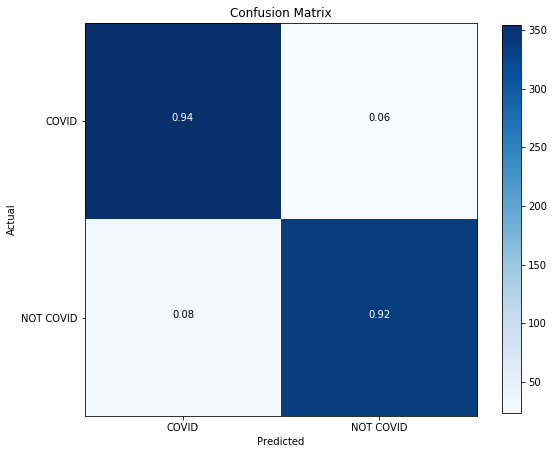

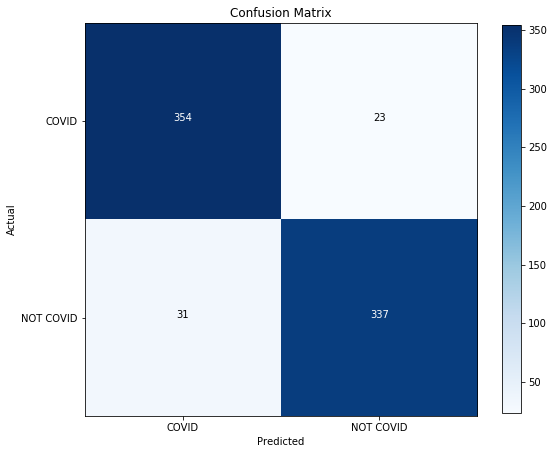

In [9]:
CATEGORIES = ["COVID", "NOT COVID"]
#Normalization - normal state
plot_confusion_matrix(cm, CATEGORIES)
#WIthout normalization
plot_confusion_matrix(cm, CATEGORIES, False)

In [10]:
# Classification report - used to compare between classification models to choose the best model
print("Classification Report")
names = CATEGORIES
print(classification_report(y_test,predict, target_names=names), "\n")

#ravel is a function from scikit-learn to flatten the arrays by turning it into lists of coordinates
TP, FP, FN, TN = confusion_matrix(y_test, predict).ravel()
print("Check Value Metrics:")
print("TP :", TP)
print("FP :", FP)
print("FN :", FN)
print("TN :", TN)

#True Positive Rate - model created correctly predicts the positive class (covid)
#TPR = True Positive (TP)/True Positive (TP) + False Negative (FN)
TPR = TP/(TP + FN)
print("True Positive Rate                 :", TPR)

#Specificity(True Negative Rate) - total correct negative predictions/ total negatives
#TNR - model created correctly predicts the negative class (not covid)
#Formula Specificity (True Negative Rate) = (True Negative - TN)/(True Negative - TN + False Positive - FP)
TNR = TN/(TN + FP)
print("True Positive Rate (Specificity)   :", TNR)

#False Positive Rate - the classification model predicts negative class falsely (covid)
#FPR = False Positive (FP)/True Negative (TN) + False Positive (FP)
FPR = FP/(FP + TN)
print("False Positive Rate                :", FPR)

#False Negative Rate (miss rate) - the classification model predicts positive class falsely (not covid)
#FNR = False Negative (FN)/True Positive (TP) + False Negative (FN)
FNR = FN/(FN + TP)
print("False Negative Rate (Miss rate)    :", FNR)

precision, recall, threshold = precision_recall_curve(y_test,predict)
#precision - proportions of correct predictions correspond to actual results 
#predicted by the machine learning algorithm in decimal
#Formula Precision = (True Positive - TP)/(True Positive - TP + False Positive - FP)
print("Precision   :", TP/(TP + FP))

#recall(sensitivity) - proportion of correct positive predictions
#Formula Recall = (True Positive - TP)/(True Positive - TP + False Negative - FN)
print("Recall      :", TP/(TP + FN))

#classification threhold - value that separates 
#and identifies respective labels depending on the line below or above (COVID, NOT COVID)
print("Threshold   :", threshold)

#F1 Score - a measure of models accuracy in a dataset and evaluate binary classification systems
#Formula F1Score = (2*Precision*Recall)/ (Precision*Recall)
print("F1 Score:   :", f1_score(y_test, predict))

Classification Report
              precision    recall  f1-score   support

       COVID       0.92      0.94      0.93       377
   NOT COVID       0.94      0.92      0.93       368

    accuracy                           0.93       745
   macro avg       0.93      0.93      0.93       745
weighted avg       0.93      0.93      0.93       745
 

Check Value Metrics:
TP : 354
FP : 23
FN : 31
TN : 337
True Positive Rate                 : 0.9194805194805195
True Positive Rate (Specificity)   : 0.9361111111111111
False Positive Rate                : 0.06388888888888888
False Negative Rate (Miss rate)    : 0.08051948051948052
Precision   : 0.9389920424403183
Recall      : 0.9194805194805195
Threshold   : [0. 1.]
F1 Score:   : 0.9258241758241758


In [11]:
#function to plot ROC curve between True Positive Rate and False Positive Rate
def plot_roc(pred, y):
    fpr,tpr, _ = metrics.roc_curve(y,pred)
    roc_auc = metrics.auc(fpr,tpr)
    print("Area Under Curve:", format(roc_auc, ".2f") )
    plt.title("Receiver Operator Characteristics (ROC) for CNN")
    plt.plot(fpr,tpr,label = "ROC Curve Area = {0:2g}".format(roc_auc))
    plt.plot([0,1],[1,0],"k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.8])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = "lower right")
    plt.show

Area Under Curve: 0.98


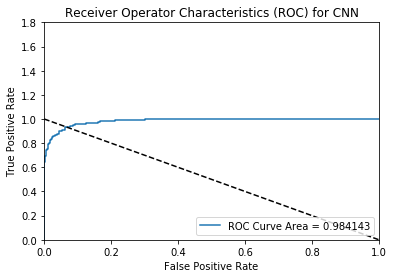

In [12]:
pred = model.predict(X_test)
predict = pred[:,0]
plot_roc(predict, y_test) #displays the ROC curve

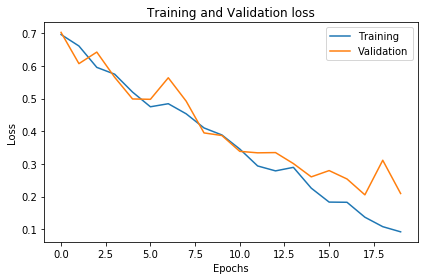

In [14]:
# Data Visualization Loss vs Epochs
epoch_value = range(1,21)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(epoch_value)+1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

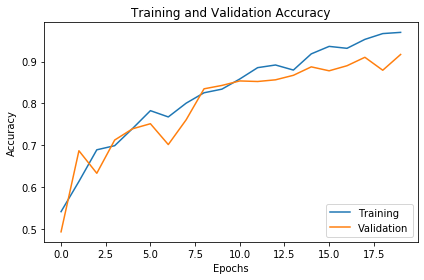

In [15]:
# Data Visualization Accuracy vs Epochs
epochs = range(1,len(epoch_value)+1)
plt.plot( history.history['accuracy'])
plt.plot( history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()